##Problem statement:-

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

##Steps:-

The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

Reading, understanding and visualising the data
Preparing the data for modelling
Building the model
Evaluate the model



In [174]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
url = "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"

In [176]:
df=pd.read_csv('/content/archive (2).zip')

#Exploratory  Data Analysis

In [177]:
pd.set_option('display.max_columns',500)

In [178]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [179]:
df.shape

(284807, 31)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [181]:
df.describe() #descriptive statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Handling missing values




In [182]:
df_missing_values = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_values

,null
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.



#checking the distribution of the classes

In [183]:
classes=df['Class'].value_counts()
classes

,count
Class,
0,284315
1,492


There are 492 fraudulent transactions done in the given data.

In [184]:
normal_transactions= round((classes[0]/df['Class'].count()*100),2)
normal_transactions

np.float64(99.83)

In [185]:
fraud_transactions=round((classes[1]/df['Class'].count()*100),2)
fraud_transactions

np.float64(0.17)

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.



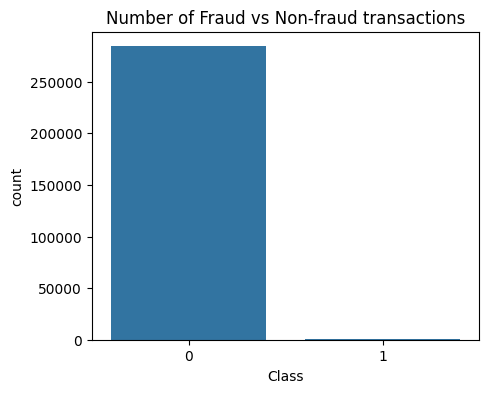

In [186]:
#barplot for the number of fraudulent transactions vs non-fraudulent transactions
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='Class')
plt.title('Number of Fraud vs Non-fraud transactions')
plt.show()

In [187]:
fraud_percentage={'class':['Fraud','Non-fraud'],
                  'percentage': [fraud_transactions,normal_transactions]}
df_fraud_percentage=pd.DataFrame(fraud_percentage)

In [188]:
df_fraud_percentage

,class,percentage
0,Fraud,0.17
1,Non-fraud,99.83


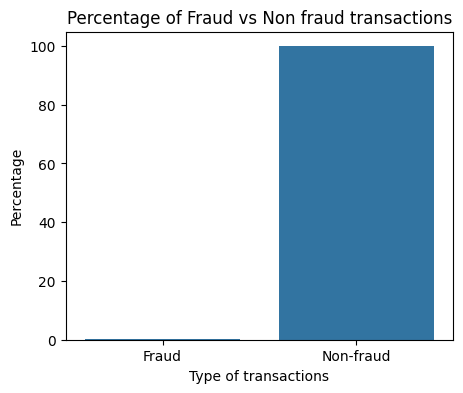

In [189]:
#percentage of fraudulent and non-fraudulent transactions
plt.figure(figsize=(5,4))
sns.barplot(data=df_fraud_percentage,x='class',y='percentage')
plt.xlabel('Type of transactions')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud vs Non fraud transactions')
plt.show()

#Outlier Treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

#Observe the distribution of classes with time


In [190]:
#creating fraudulent dataframe
data_fraud=df[df['Class']==1]
#creating non fraudulent dataframe
data_non_fraud=df[df['Class']==0]

In [191]:
data_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


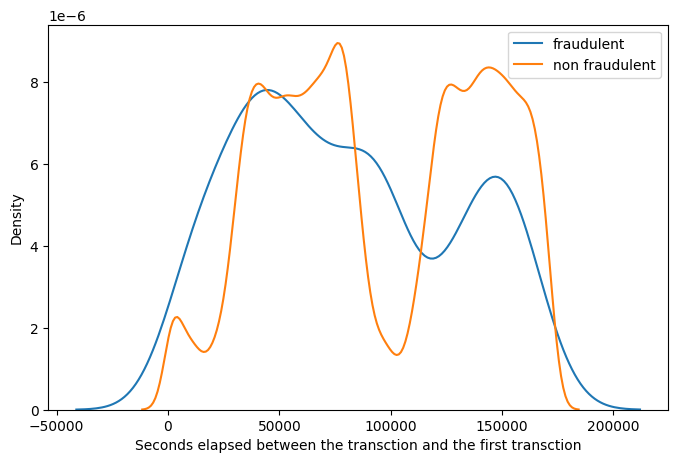

In [192]:
  # Distribution plot
plt.figure(figsize=(8,5))
ax = sns.kdeplot(data_fraud['Time'],label='fraudulent')
ax = sns.kdeplot(data_non_fraud['Time'],label='non fraudulent')
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend(loc='best')
plt.show()


Analysis:

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [193]:
#dropping the time column
df.drop(columns='Time',axis=1,inplace=True)

In [194]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


observe the distribution of class with respect to amount

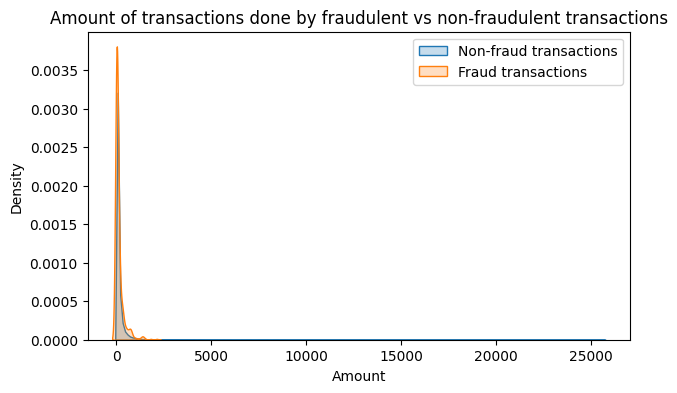

In [195]:
#Distribution plot
plt.figure(figsize=(7,4))
sns.kdeplot(data_non_fraud['Amount'],label='Non-fraud transactions',fill=True)
sns.kdeplot(data_fraud['Amount'],label='Fraud transactions',fill=True)
plt.title('Amount of transactions done by fraudulent vs non-fraudulent transactions')
plt.legend(loc='best')
plt.show()

Analysis

We can see that the fraudulent transactions are mostly densed in the lower range of amount, whereas the non-fraudulent transactions are spreaded throughout low to high range of amount.



Fraudulent transactions show a distinct bimodal pattern compared to normal transactions:

Both show high frequency at low amounts (0-1000)

But only fraud shows a second peak at higher amounts (1000-2000)



#train-test split

In [196]:
#import libraries
from sklearn.model_selection import train_test_split


In [197]:
#putting feature variable into x
x=df.drop('Class',axis=1)
#putting target variable into y
y=df['Class']

In [198]:
#splitting the data into training and testing data 80:20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

#Feature scaling
We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.



In [199]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [200]:
# Instantiate the Scaler
sc=StandardScaler()

In [201]:
# Fit the data into scaler and transform
x_train['Amount']=sc.fit_transform(x_train[['Amount']])


In [202]:
# Transform the test set
x_test['Amount']=sc.transform(x_test[['Amount']])

In [203]:
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
93414,1.174064,0.556525,-0.507559,1.116601,0.414206,-0.281208,0.067073,0.109215,-0.204072,-0.531570,1.606650,0.101051,-0.950264,-0.963079,0.757479,0.635688,0.850841,0.849661,-0.564818,-0.162114,-0.019706,-0.024754,-0.136988,-0.464710,0.603481,-0.291954,0.041966,0.038768,-0.344215
249357,0.054834,0.907661,-1.036560,-0.073671,0.117500,-1.018951,0.610666,0.290287,-0.350575,-0.990729,1.061161,0.318202,-0.697028,-0.182720,0.060378,0.360901,0.456319,1.189207,-0.074424,-0.166320,0.414947,1.043702,0.045485,-0.075339,-0.325324,-0.169078,-0.091674,-0.054086,-0.101361
273132,-1.146244,-0.011542,1.665540,0.336664,1.164780,-0.670908,0.355551,0.102101,0.253013,-0.993371,-1.615850,0.653460,0.254409,-0.481359,-1.955226,-0.253776,-0.391648,-0.781622,-0.358190,0.023351,-0.388502,-1.182458,0.143772,-0.188590,-0.076517,-1.189853,0.126902,0.164425,-0.267749
70837,1.470474,-0.793616,-0.017474,-1.392175,-0.929712,-0.821504,-0.459357,-0.306853,-2.344637,1.373918,0.013299,-0.199782,1.392035,-0.215063,0.439434,-0.995775,0.874905,-1.134515,-0.338742,-0.273093,-0.456092,-0.927945,0.154969,0.041212,0.294964,-0.424831,0.023049,0.017270,-0.225024
49517,-0.346320,1.098257,1.279662,0.067734,-0.023686,-0.979913,0.711838,-0.056131,-0.345814,-0.506879,-0.269409,-0.263379,-0.224719,-0.360664,0.931581,0.399704,0.027763,-0.094769,-0.090384,0.102108,-0.264960,-0.717222,0.000981,0.324232,-0.170319,0.072827,0.241724,0.097837,-0.314162


In [204]:
x_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
245610,2.059980,-0.844971,-1.207683,-0.704862,-0.745547,-0.534809,-1.010118,0.045314,-0.085643,0.250257,1.015598,-0.478145,-0.458021,-1.798004,-0.229771,1.927809,1.098448,0.138873,0.537969,0.058251,0.283744,0.799541,0.042808,-0.508817,-0.181231,-0.082585,0.019243,-0.022223,-0.175512
280690,-1.784634,0.634279,0.272226,-0.066718,-0.629629,-0.550614,0.026553,0.829429,-0.458780,-0.684933,0.233253,0.020999,-1.666843,1.169865,-0.356415,0.373678,-0.096208,0.568444,0.574291,-0.423181,0.157879,0.100319,-0.076642,0.073184,-0.161472,0.277890,-0.390407,-0.062382,-0.054085
44001,-2.144411,1.073499,-2.773663,1.384394,-4.015477,0.747235,1.525638,0.192988,-2.431862,-4.155838,4.354775,-2.872400,0.468875,-4.555667,0.699671,-2.901141,-4.674667,-2.213623,1.296165,0.668124,0.144653,-0.885682,0.625099,0.096527,-0.189455,0.532908,0.423045,-0.210266,2.800407
412,1.145614,0.004148,0.772422,0.916543,-0.568699,-0.281603,-0.161752,-0.025480,0.479307,-0.290947,-0.118965,1.135894,0.734979,-0.329917,-0.245924,-0.764725,0.427097,-1.229510,-0.301616,-0.098173,-0.046280,0.174420,-0.014831,0.481153,0.460998,0.417277,0.007883,0.014894,-0.299842
194043,2.223172,-0.796640,-1.273254,-1.292398,-0.150683,-0.077139,-0.641633,-0.070280,-0.544780,0.910774,0.022960,0.133148,0.877213,-0.136005,-0.379007,1.735855,-0.635779,-1.000722,1.554580,0.068006,-0.283441,-0.905845,0.292509,-1.433177,-0.388761,-0.625948,-0.016329,-0.065385,-0.269868


#Checking the skewness

In [205]:
#listing the columns
cols= x_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

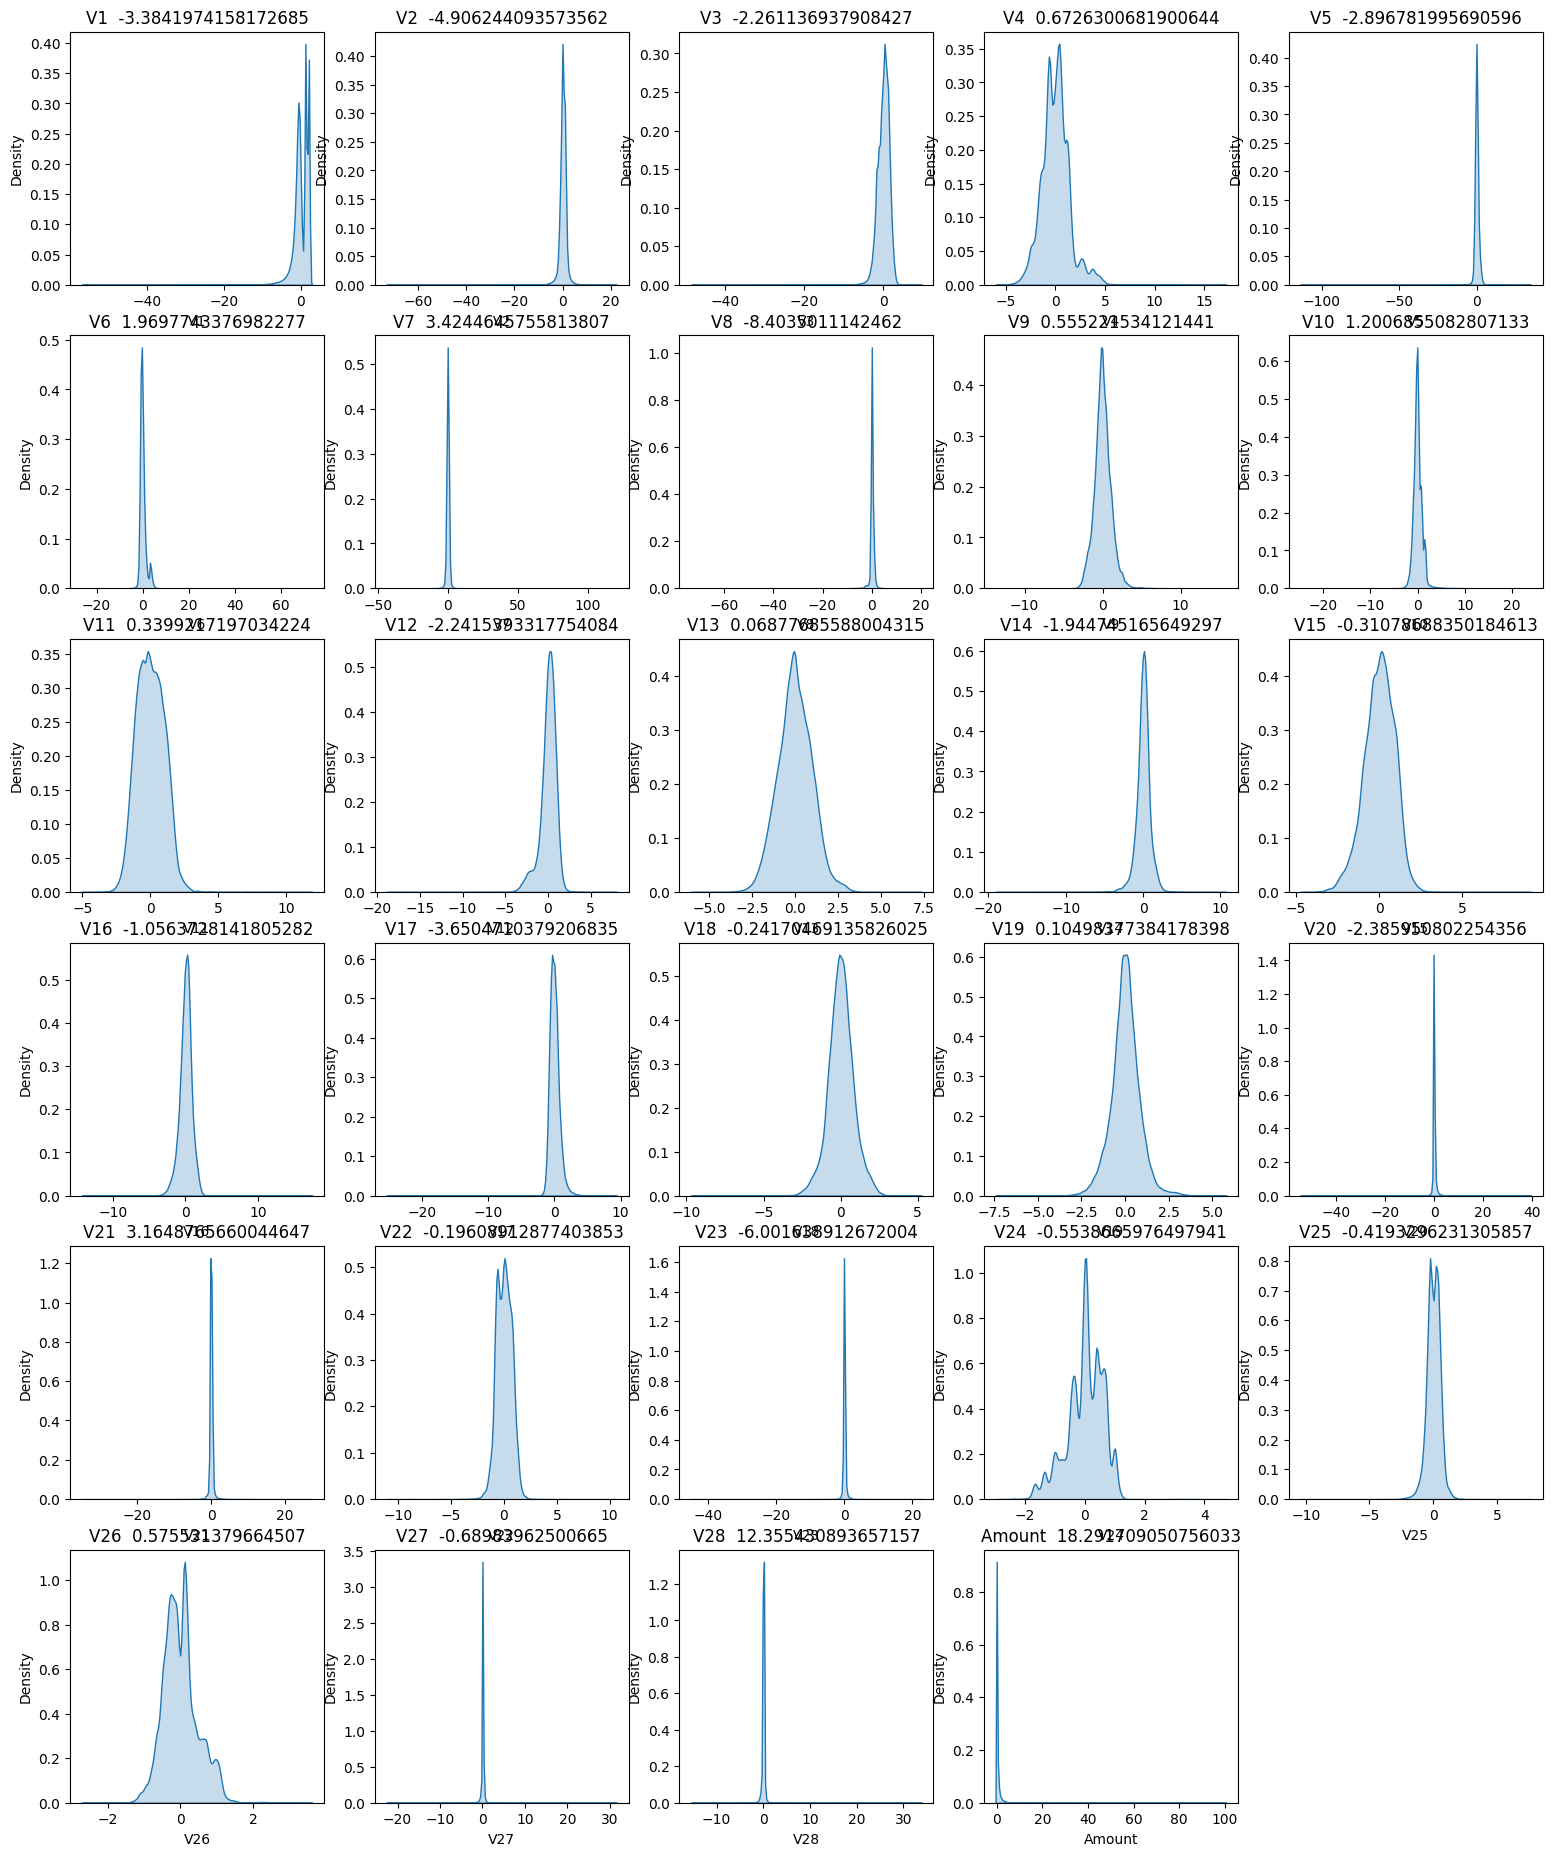

In [206]:
#plotting the distribution of skewness for all the columns
k=0
plt.figure(figsize=(19,23))
for col in cols:
  k=k+1
  plt.subplot(6, 5,k)
  sns.kdeplot(x_train[col],fill=True)
  plt.title(col+'  '+str(x_train[col].skew()))



Upon examining the skewness of the PCA-transformed features, it was found that many variables followed a moderate to high positive or negative skewness. Such skewed distributions can introduce bias and affect model performance; hence, normalization will be applied to achieve more balanced and symmetric feature distributions

##Mitigate skweness with PowerTransformer


In [207]:
#Importing powertransformer
from sklearn.preprocessing import PowerTransformer
#Instantiate the powertransformer
pt=PowerTransformer(method='yeo-johnson',standardize=True,copy=False)
#fit and transform the train data
x_train[cols]=pt.fit_transform(x_train)


In [208]:
#transform the testing data
x_test[cols]=pt.transform(x_test)

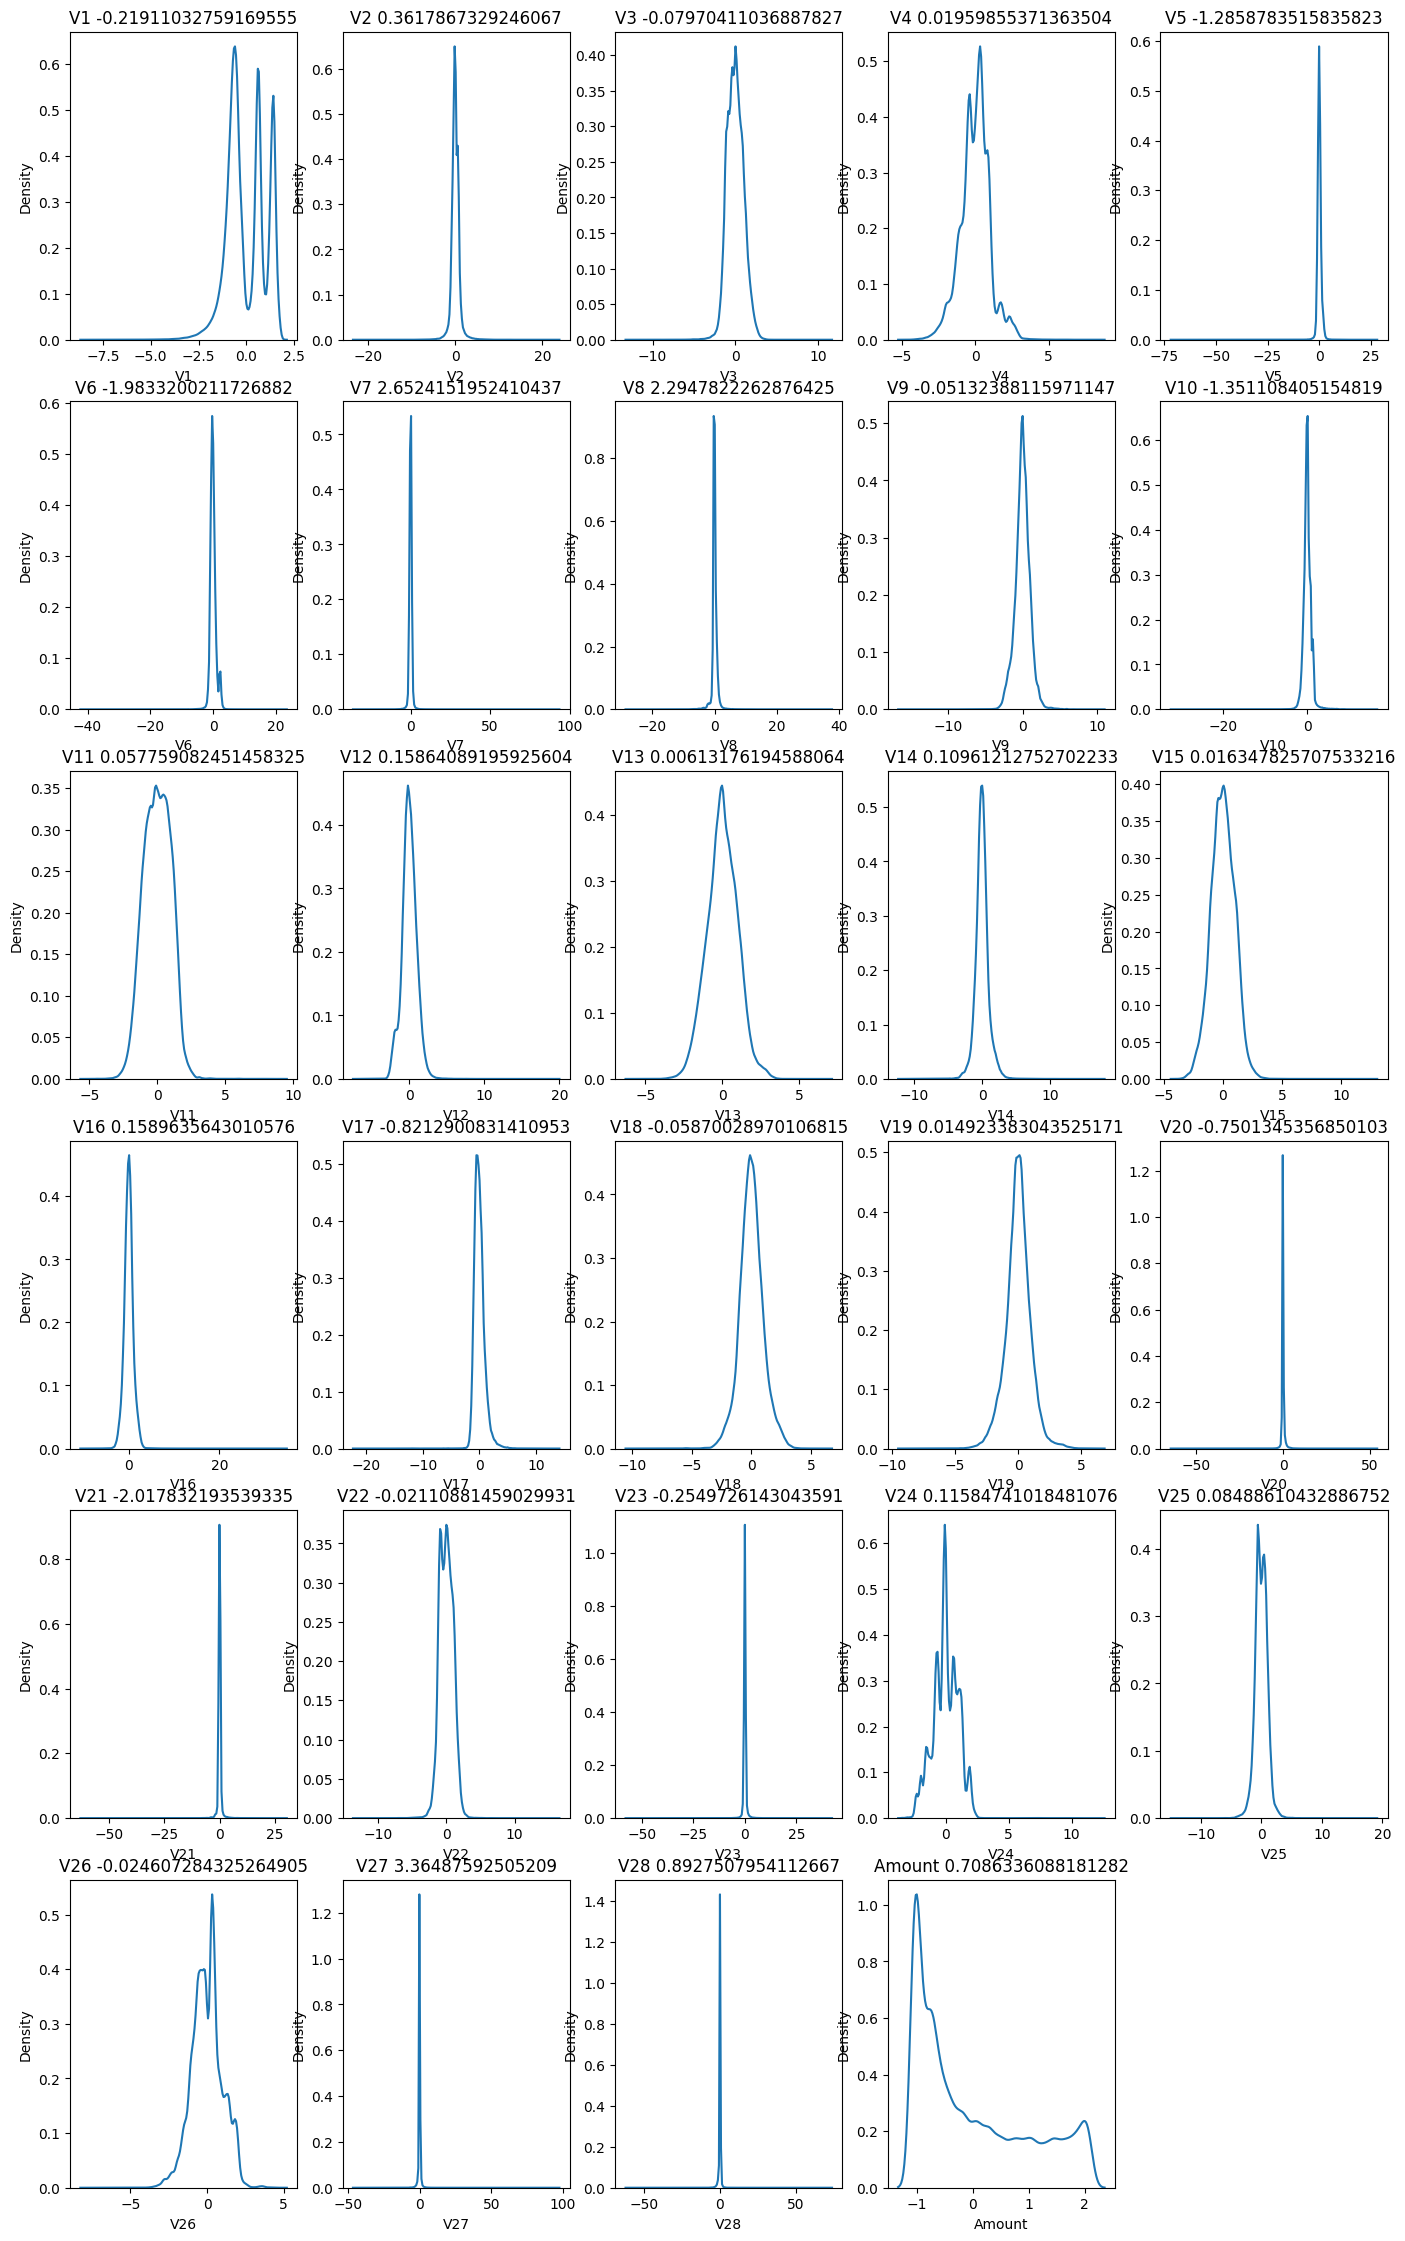

In [209]:
# Plotting the distribution of the variables (after powertransformation) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.kdeplot(x_train[col])
    plt.title(col+' '+str(x_train[col].skew()))

##Handling data imbalance

As we see that the data is heavily imbalanced, to prevent the model from being biased toward the majority class and to improve its ability to detect frauds, resampling techniques are used to balance the classes.


Undersampling :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)

Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.

SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.

Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

#**Undersampling**


In [210]:
#importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [211]:
# instantiating the random undersampler
rus=RandomUnderSampler()
#resampling x and y
x_train_rus,y_train_rus=rus.fit_resample(x_train,y_train)

In [212]:
#before sampling class distribution
print('before sampling class distribution:',Counter(y_train))
#after sampling class distribution
print('after sampling class distribution:',Counter(y_train_rus))

before sampling class distribution: Counter({0: 227465, 1: 380})
after sampling class distribution: Counter({0: 380, 1: 380})


#Model building on balanced data with Undersampling





#***Logistic Regression***

In [213]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [214]:
#creating k-fold object with 5 splits
folds=KFold(n_splits=5,shuffle=True,random_state=67)

#specify parameters
params={"C":[0.01,0.1,1,10,100,1000]}

#specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(x_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=67, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [215]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051091,0.006207,0.011820,0.001862,0.01,{'C': 0.01},0.991169,0.977003,0.987570,0.978960,0.987699,0.984480,0.005496,1,0.988595,0.990582,0.988501,0.991352,0.988638,0.989534,0.001196
1,0.041157,0.022144,0.011016,0.002958,0.10,{'C': 0.1},0.987186,0.975784,0.988270,0.976700,0.989951,0.983578,0.006062,3,0.990067,0.991730,0.990190,0.992445,0.990153,0.990917,0.000983
2,0.021554,0.003715,0.008230,0.001253,1.00,{'C': 1},0.987013,0.978223,0.987395,0.976874,0.989432,0.983787,0.005178,2,0.991159,0.992715,0.991922,0.993398,0.991062,0.992051,0.000899
3,0.038263,0.016505,0.011256,0.004214,10.00,{'C': 10},0.987532,0.975087,0.981443,0.977395,0.987526,0.981797,0.005104,4,0.991408,0.993191,0.992301,0.993690,0.991332,0.992385,0.000940
4,0.036402,0.004079,0.009495,0.001972,100.00,{'C': 100},0.988918,0.970557,0.980742,0.974961,0.986486,0.980333,0.006872,5,0.991560,0.994100,0.993146,0.994080,0.991257,0.992828,0.001214
5,0.049137,0.023318,0.010004,0.002333,1000.00,{'C': 1000},0.989091,0.969164,0.980917,0.972353,0.987872,0.979879,0.008016,6,0.991462,0.994274,0.993308,0.994134,0.991311,0.992898,0.001278


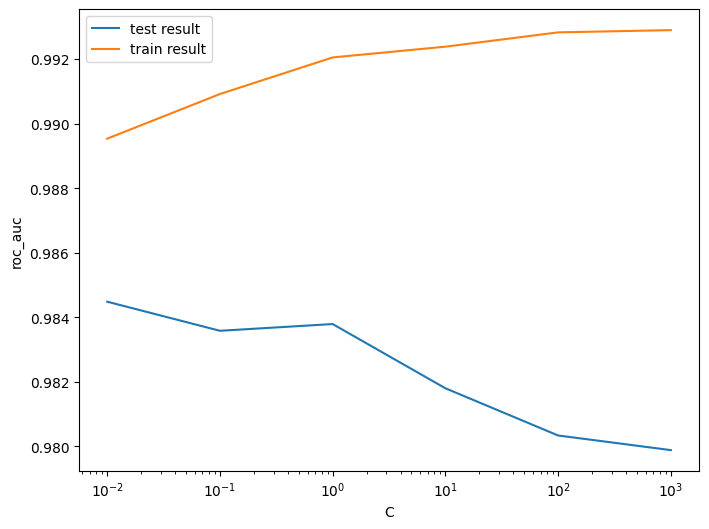

In [216]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [217]:
model_cv.best_params_

{'C': 0.01}

In [218]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9844803524075891 at C = 0.01




`***Logistic regression with optimal C***

In [219]:
#instantiate the model with the best C
model=LogisticRegression(C=0.01)

In [220]:
#fit the model on train set
model.fit(x_train_rus,y_train_rus)

LogisticRegression(C=0.01)

In [221]:
#Predictions on the train set
y_pred=model.predict(x_train_rus)

In [222]:
#importing libraries
from sklearn.metrics import *

In [223]:
#Confusion matrix
confusion=confusion_matrix(y_train_rus,y_pred)
print(confusion)

[[375   5]
 [ 46 334]]


In [224]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [225]:
# Accuracy
print("Accuracy:-",accuracy_score(y_train_rus, y_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_pred))

Accuracy:- 0.9328947368421052
Sensitivity:- 0.8789473684210526
Specificity:- 0.9868421052631579
F1-Score:- 0.9290681502086231


In [226]:
#classification report
print(classification_report(y_train_rus,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       380
           1       0.99      0.88      0.93       380

    accuracy                           0.93       760
   macro avg       0.94      0.93      0.93       760
weighted avg       0.94      0.93      0.93       760



In [227]:
# Predicted probability
y_train_pred_proba = model.predict_proba(x_train_rus)[:,1]


In [228]:
# roc_auc
auc =roc_auc_score(y_train_rus, y_train_pred_proba)
auc


np.float64(0.989314404432133)

In [229]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


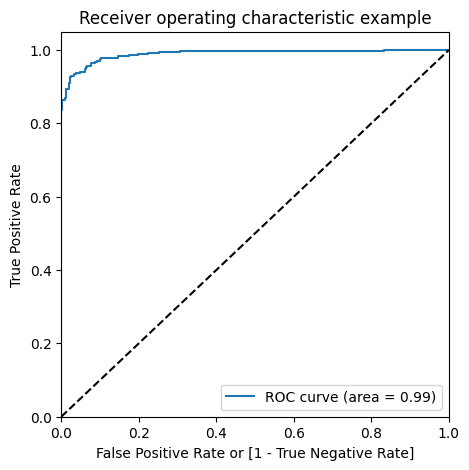

In [230]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)


In [231]:
#Prediction on test data
y_test_pred =model.predict(x_test)


In [232]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)


[[56355   495]
 [   13    99]]


In [233]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [234]:
# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9910817738141217
Sensitivity:- 0.8839285714285714
Specificity:- 0.9912928759894459


In [235]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56850
           1       0.17      0.88      0.28       112

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.64     56962
weighted avg       1.00      0.99      0.99     56962



In [236]:
# Predicted probability
y_test_pred_proba = model.predict_proba(x_test)[:,1]

In [237]:
# roc_auc
auc =roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9637124638773714)

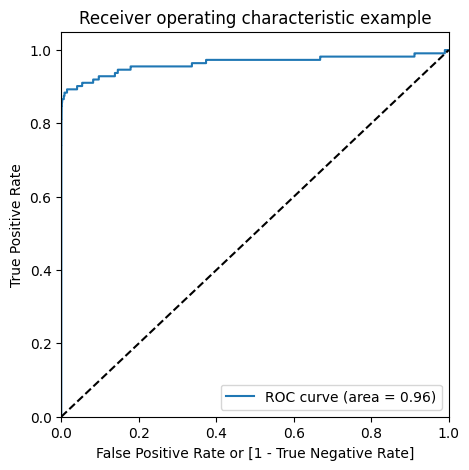

In [238]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set
* Accuracy=0.93
* Sensitivity=0.88
* Specificity = 0.99
* ROC = 0.99

Test set
* Accuracy=0.99
* Sensitivity=0.88
* Specificity = 0.99
* ROC = 0.96

#***XGBoost***

In [239]:
#import libraries
from xgboost import XGBClassifier

In [240]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train_rus, y_train_rus)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [241]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.105963,0.004183,0.007356,0.001291,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.983198,0.989064,0.959318,0.977193,0.012865,5,1.0,1.0,1.0,1.0,0.0
1,0.113949,0.007259,0.006425,0.000014,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.988840,0.988939,0.964317,0.980699,0.011584,1,1.0,1.0,1.0,1.0,0.0
2,0.126692,0.015700,0.007453,0.001517,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.985740,0.987127,0.964004,0.978957,0.010588,3,1.0,1.0,1.0,1.0,0.0
3,0.078262,0.003699,0.006265,0.000019,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.979602,0.981815,0.958130,0.973182,0.010682,6,1.0,1.0,1.0,1.0,0.0
4,0.080723,0.004978,0.006670,0.000235,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.986360,0.986314,0.959818,0.977497,0.012501,4,1.0,1.0,1.0,1.0,0.0
5,0.090044,0.003206,0.008044,0.002397,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.986112,0.985064,0.965817,0.978998,0.009330,2,1.0,1.0,1.0,1.0,0.0


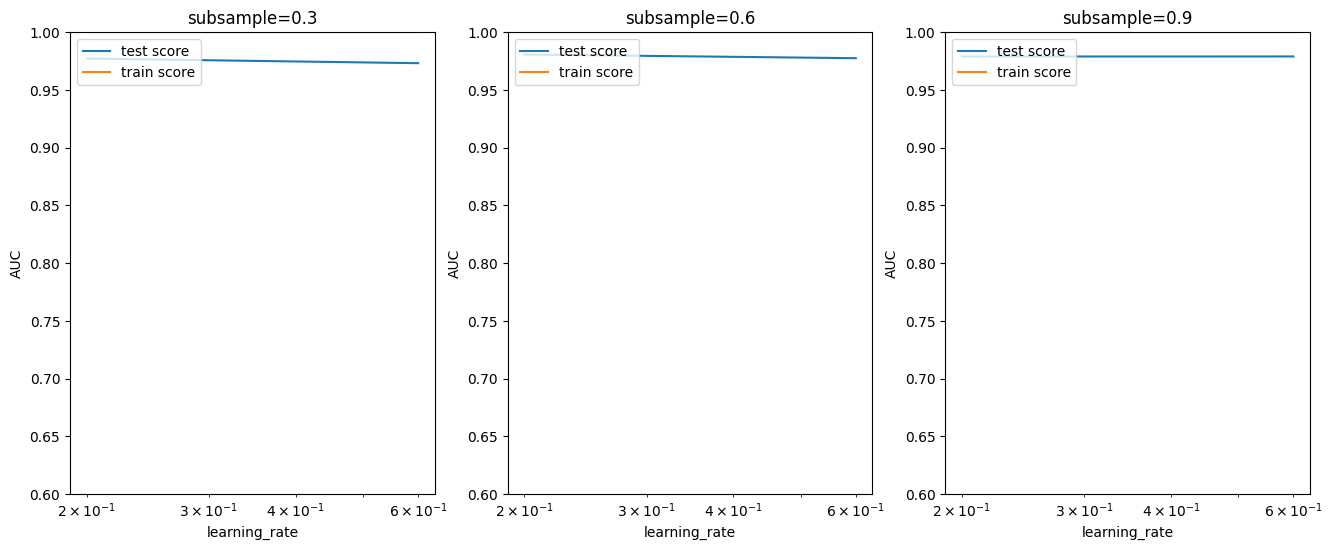

In [242]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [243]:
model_cv.best_params_


{'learning_rate': 0.2, 'subsample': 0.6}

In [244]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(x_train_rus, y_train_rus)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:44:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "params" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [245]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(x_train_rus)

In [246]:
# Confusion matrix
confusion = confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[380   0]
 [  0 380]]


In [247]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [248]:
# Accuracy
print("Accuracy:-",accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [249]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760



In [250]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(x_train_rus)[:,1]
# roc_auc
auc =roc_auc_score(y_train_rus, y_train_pred_proba)
auc

np.float64(1.0)

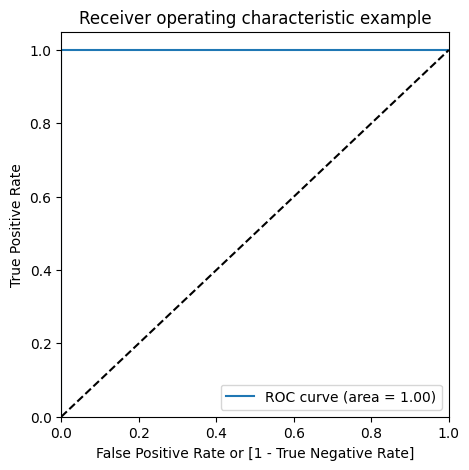

In [251]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [252]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(x_test)

In [253]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)


[[54601  2249]
 [    8   104]]


In [254]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [255]:
# Accuracy
print("Accuracy:-", accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9603770935009305
Sensitivity:- 0.9285714285714286
Specificity:- 0.9604397537379068


In [256]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56850
           1       0.04      0.93      0.08       112

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [257]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(x_test)[:,1]

In [258]:
# roc_auc
auc = roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9732769506219374)

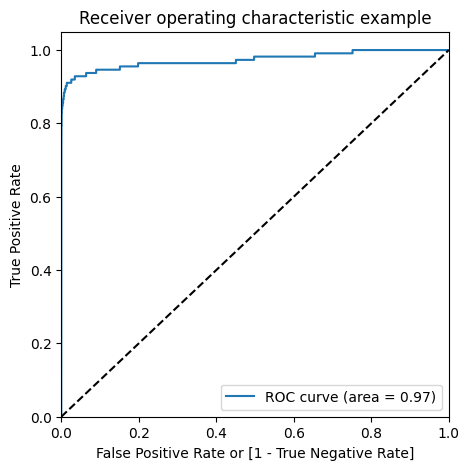

In [259]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

Train set
* Accuracy = 1.0
* Sensitivity = 1.0
* Specificity = 1.0
* ROC-AUC = 1.0

Test set
* Accuracy = 0.95
* Sensitivity = 0.90
* Specificity = 0.95
* ROC-AUC = 0.96


#***Decision Tree***

In [260]:
#import libraries
from sklearn.tree import DecisionTreeClassifier

In [261]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [262]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009351,0.000715,0.003720,0.000080,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.966272,0.972347,0.949163,0.962594,0.009816,3
1,0.008906,0.000582,0.003500,0.000186,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.966334,0.976972,0.951475,0.964927,0.010456,1
2,0.007015,0.000339,0.003401,0.000122,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.960165,0.966504,0.944976,0.957215,0.009033,7
3,0.006684,0.000081,0.004186,0.001386,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.962924,0.966629,0.945476,0.958343,0.009223,5
4,0.008597,0.000239,0.003564,0.000374,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.965900,0.973847,0.951475,0.963741,0.009260,2
5,0.009093,0.000813,0.003633,0.000487,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.966086,0.969598,0.947788,0.961157,0.009562,4
6,0.007536,0.000606,0.004119,0.001058,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.963296,0.966504,0.944976,0.958259,0.009483,6
7,0.009512,0.001730,0.004627,0.000935,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.960227,0.966504,0.944726,0.957152,0.009153,8


In [263]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.964926792287447
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [264]:
#Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(x_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [265]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(x_train_rus)

In [266]:
# Confusion matrix
confusion = confusion_matrix(y_train_rus, y_train_pred)
print(confusion)


[[363  17]
 [ 43 337]]


In [267]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9210526315789473
Sensitivity:- 0.8868421052631579
Specificity:- 0.9552631578947368


In [268]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       380
           1       0.95      0.89      0.92       380

    accuracy                           0.92       760
   macro avg       0.92      0.92      0.92       760
weighted avg       0.92      0.92      0.92       760



In [269]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(x_train_rus)[:,1]
# roc_auc
auc = roc_auc_score(y_train_rus, y_train_pred_proba)
auc

np.float64(0.9803150969529086)

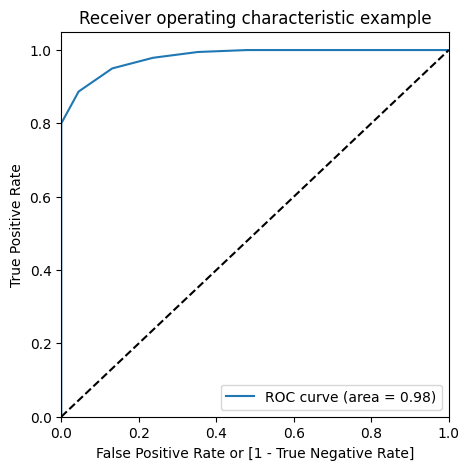

In [270]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [271]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(x_test)

In [272]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54051  2799]
 [   12   100]]


In [273]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9506513114005829
Sensitivity:- 0.8928571428571429
Specificity:- 0.9507651715039578


In [274]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56850
           1       0.03      0.89      0.07       112

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [275]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(x_test)[:,1]


In [276]:
# roc_auc
auc = roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9573110629476065)

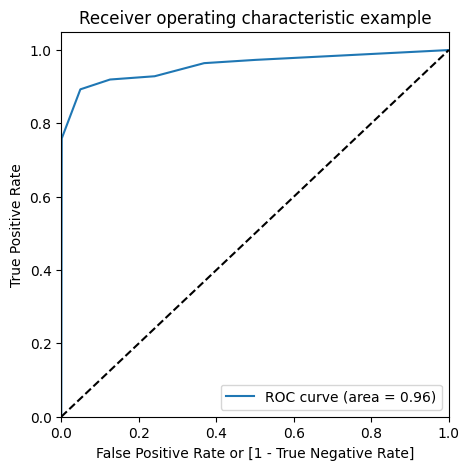

In [277]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set
* Accuracy = 0.92
* Sensitivity = 0.88
* Specificity = 0.96
* ROC-AUC = 0.98

Test set
* Accuracy = 0.94
* Sensitivity = 0.89
* Specificity = 0.94
* ROC-AUC = 0.95


#***Random Forest***

In [278]:
#import libraries
from sklearn.ensemble import RandomForestClassifier

In [279]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(x_train_rus, y_train_rus)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [280]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9781717451523546 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [281]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)


In [282]:
# Fit the model
rfc_bal_rus_model.fit(x_train_rus, y_train_rus)


RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

In [283]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(x_train_rus)

In [284]:
# Confusion matrix
confusion = confusion_matrix(y_train_rus, y_train_pred)
print(confusion)


[[372   8]
 [ 43 337]]


In [285]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9328947368421052
Sensitivity:- 0.8868421052631579
Specificity:- 0.9789473684210527
F1-Score:- 0.9296551724137931


In [286]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.98      0.89      0.93       380

    accuracy                           0.93       760
   macro avg       0.94      0.93      0.93       760
weighted avg       0.94      0.93      0.93       760



In [287]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(x_train_rus)[:,1]
# roc_auc
auc = roc_auc_score(y_train_rus, y_train_pred_proba)
auc

np.float64(0.9856509695290859)

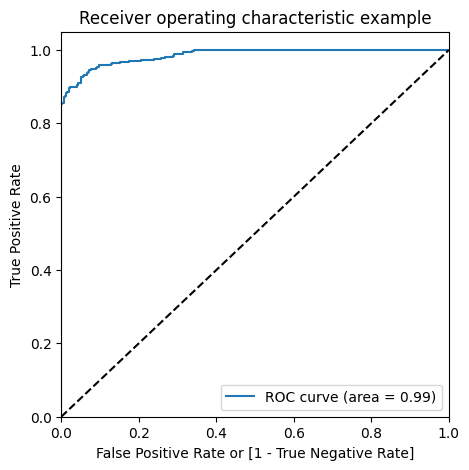

In [288]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [289]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(x_test)


In [290]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55777  1073]
 [   13    99]]


In [291]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9809346581931814
Sensitivity:- 0.8839285714285714
Specificity:- 0.9811257695690413


In [292]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.08      0.88      0.15       112

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [293]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(x_test)[:,1]
# roc_auc
auc = roc_auc_score(y_test, y_test_pred_proba)
auc

np.float64(0.9653403379821586)

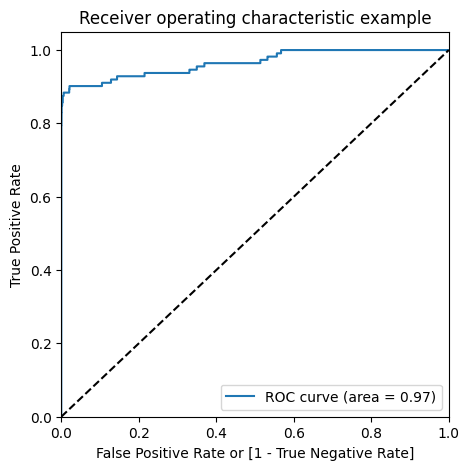

In [294]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


**Model summary**

Train set

* Accuracy = 0.93
* Sensitivity = 0.88
* Specificity = 0.98
* ROC-AUC = 0.99

Test set
* Accuracy = 0.98
* Sensitivity = 0.88
* Specificity = 0.98
* ROC-AUC = 0.96


#**SMOTE (Synthetic Minority Oversampling Technique)**



We are creating synthetic samples for minority class by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).



In [295]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [296]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [297]:
#before sampling class distribution
print('before sampling class distribution:',Counter(y_train))
#after sampling class distribution
print('after sampling class distribution:',Counter(y_train_smote))

before sampling class distribution: Counter({0: 227465, 1: 380})
after sampling class distribution: Counter({0: 227465, 1: 227465})


#**Logistic Regression**

In [298]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [299]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.216998,0.372113,0.057557,0.009366,0.01,{'C': 0.01},0.991754,0.991734,0.991638,0.991557,0.991728,0.991682,0.000074,6,0.991669,0.991701,0.991677,0.991723,0.991703,0.991694,0.000019
1,2.317584,0.309140,0.056109,0.015804,0.10,{'C': 0.1},0.991796,0.991759,0.991657,0.991605,0.991754,0.991714,0.000071,5,0.991698,0.991734,0.991709,0.991755,0.991736,0.991726,0.000020
2,2.375705,0.259289,0.058840,0.023924,1.00,{'C': 1},0.991801,0.991763,0.991659,0.991608,0.991757,0.991718,0.000072,4,0.991702,0.991740,0.991713,0.991756,0.991740,0.991730,0.000020
3,2.367441,0.264104,0.062452,0.014300,10.00,{'C': 10},0.991801,0.991763,0.991659,0.991608,0.991757,0.991718,0.000072,3,0.991702,0.991740,0.991713,0.991756,0.991740,0.991730,0.000020
4,2.369946,0.244232,0.067537,0.007789,100.00,{'C': 100},0.991801,0.991763,0.991659,0.991608,0.991757,0.991718,0.000072,2,0.991702,0.991740,0.991713,0.991756,0.991740,0.991730,0.000020
5,2.354867,0.258073,0.073670,0.011515,1000.00,{'C': 1000},0.991801,0.991763,0.991659,0.991608,0.991757,0.991718,0.000072,1,0.991702,0.991740,0.991713,0.991756,0.991740,0.991730,0.000020


In [300]:
model_cv.best_params_

{'C': 1000}

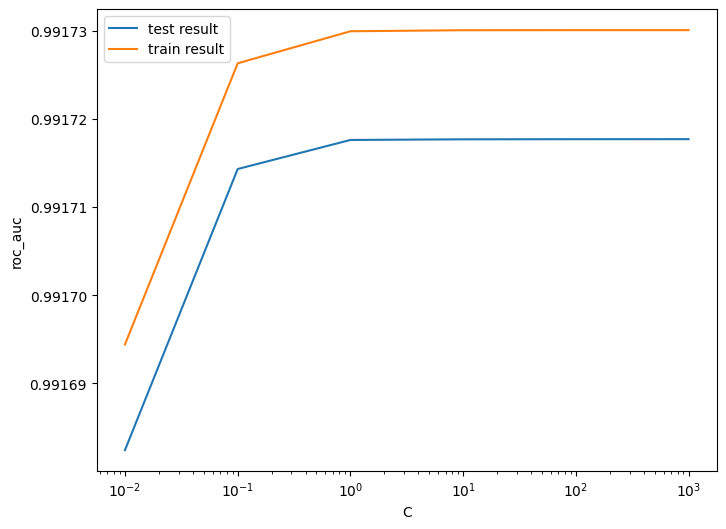

In [301]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [302]:
#best score with best C parameter
best_score=model_cv.best_score_
best_param=model_cv.best_params_['C']
print('the best roc_auc the model can give is {0} with the parameter C={1}'.format(best_score,best_param))

the best roc_auc the model can give is 0.9917177103983326 with the parameter C=1000


##Logistc regression with optimal C

In [303]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=1000)


In [304]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [305]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [306]:
y_train_smote.shape

(454930,)

In [307]:
y_train_pred.shape

(454930,)

In [308]:
# Confusion matrix
confusion =confusion_matrix(y_train_smote, y_train_pred)
print(confusion)


[[221112   6353]
 [ 16774 210691]]


In [309]:
227465*2

454930

In [310]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9491636075879806
Sensitivity:- 0.9262567867584024
Specificity:- 0.9720704284175588


In [311]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    227465
           1       0.97      0.93      0.95    227465

    accuracy                           0.95    454930
   macro avg       0.95      0.95      0.95    454930
weighted avg       0.95      0.95      0.95    454930



In [312]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

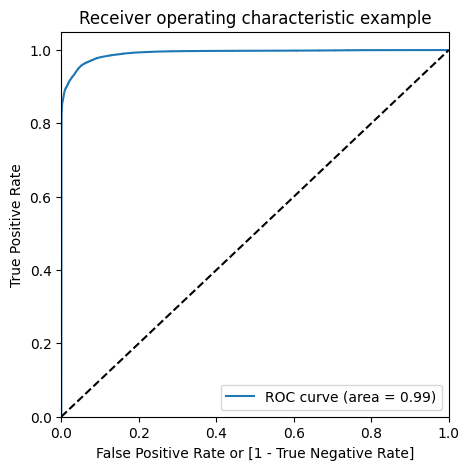

In [313]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

In [315]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(x_test)

In [317]:
# Confusion matrix
confusion =confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55391  1459]
 [   12   100]]


In [319]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9741757663003405
Sensitivity:- 0.8928571428571429
Specificity:- 0.9743359718557608


In [320]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.06      0.89      0.12       112

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962



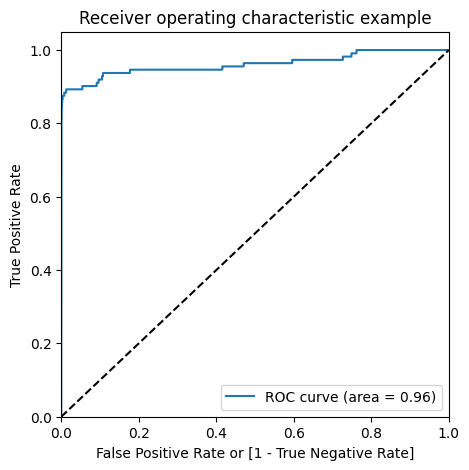

In [322]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(x_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#**Model summary**

Train set
* Accuracy = 0.94
* Sensitivity = 0.92
* Specificity = 0.97
* ROC = 0.99

Test set
* Accuracy = 0.97
* Sensitivity = 0.89
* Specificity = 0.97
* ROC = 0.96

##***XGBoost***

In [323]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [324]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.825084,0.605107,0.257800,0.053570,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999726,0.999724,0.999641,0.999697,0.000040,4,0.999747,0.999735,0.999719,0.999734,0.000011
1,6.568311,0.727418,0.216645,0.000391,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999701,0.999714,0.999669,0.999694,0.000019,5,0.999708,0.999708,0.999744,0.999720,0.000017
2,6.595275,0.581006,0.253887,0.054434,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999694,0.999700,0.999619,0.999671,0.000037,6,0.999705,0.999701,0.999703,0.999703,0.000002
3,7.296734,0.500259,0.235886,0.023683,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999926,0.999951,0.999947,0.999942,0.000011,2,0.999968,0.999973,0.999973,0.999971,0.000002
4,7.029443,0.665180,0.239695,0.036501,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999936,0.999952,0.999935,0.999941,0.000008,3,0.999978,0.999978,0.999971,0.999976,0.000003
5,6.895910,0.690366,0.231081,0.021310,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999939,0.999955,0.999946,0.999946,0.000007,1,0.999979,0.999977,0.999980,0.999979,0.000002


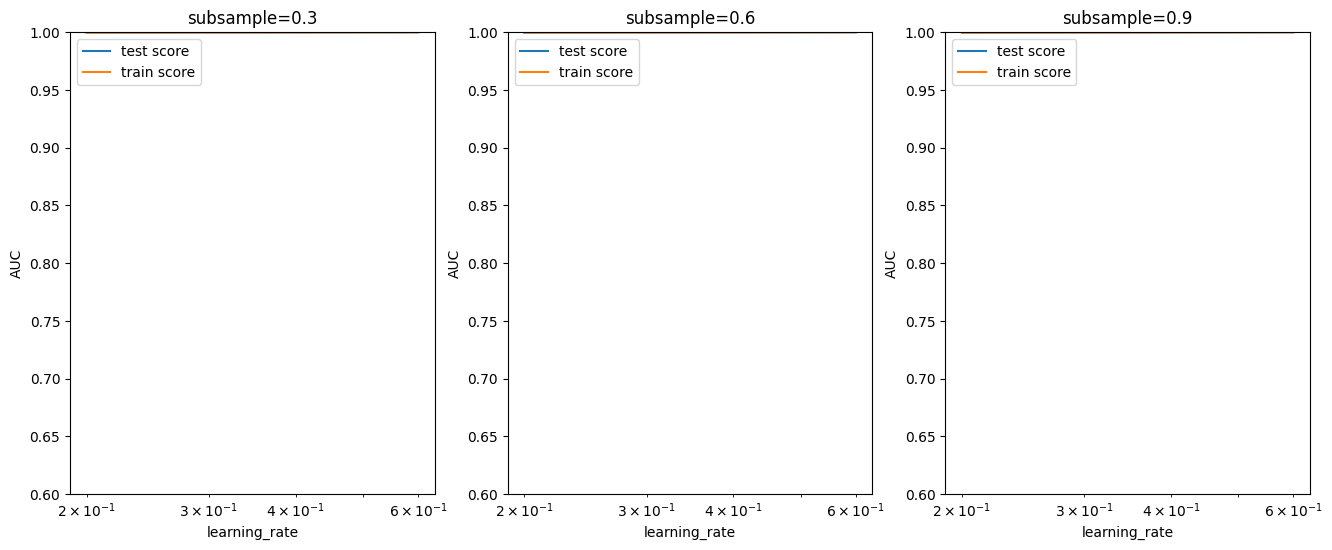

In [325]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [326]:
model_cv.best_params_


{'learning_rate': 0.6, 'subsample': 0.9}

**Model with optimal hyperparameters**

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.6 and subsample: 0.9

In [327]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:06:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "params" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [328]:
# Confusion matrix
confusion = confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221112   6353]
 [ 16774 210691]]


In [329]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9491636075879806
Sensitivity:- 0.9262567867584024
Specificity:- 0.9720704284175588


In [330]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    227465
           1       0.97      0.93      0.95    227465

    accuracy                           0.95    454930
   macro avg       0.95      0.95      0.95    454930
weighted avg       0.95      0.95      0.95    454930



In [331]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

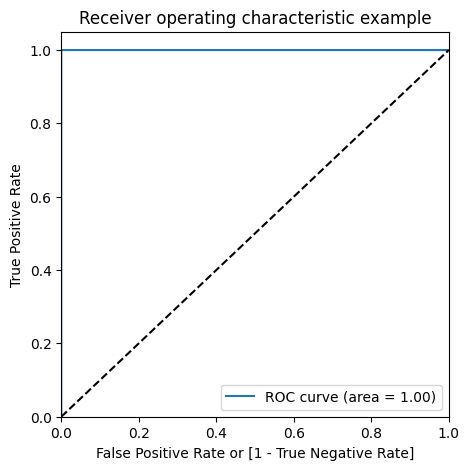

In [332]:
# roc_auc
auc = roc_auc_score(y_train_smote, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(x_test)

In [333]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55391  1459]
 [   12   100]]


In [334]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9741757663003405
Sensitivity:- 0.8928571428571429
Specificity:- 0.9743359718557608


In [335]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.06      0.89      0.12       112

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [337]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(x_test)[:,1]

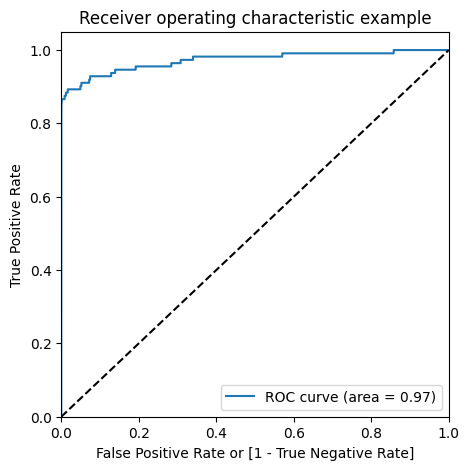

In [338]:
# roc_auc
auc = roc_auc_score(y_test, y_test_pred_proba)
auc

#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

Train set

* Accuracy = 0.94
* Sensitivity = 0.92
* Specificity = 0.97
* ROC-AUC = 1.0

Test set

* Accuracy = 0.97
* Sensitivity = 0.89
* Specificity = 0.97
* ROC-AUC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

#***Decision Tree***

In [342]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [343]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,15.303835,4.596990,0.050374,0.001223,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.988384,0.988238,0.987815,0.988145,0.000241,8
1,12.345480,0.240854,0.051612,0.004317,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.988384,0.988238,0.987815,0.988146,0.000242,7
2,12.239414,0.209671,0.050033,0.000840,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.988420,0.988288,0.987791,0.988166,0.000271,5
3,12.086391,0.080583,0.049505,0.001051,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.988416,0.988283,0.987781,0.988160,0.000274,6
4,22.585968,0.691947,0.056207,0.002156,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998264,0.998331,0.998135,0.998243,0.000081,1
5,22.367454,0.092412,0.054925,0.000181,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998172,0.998284,0.998167,0.998208,0.000054,2
6,22.032467,0.215034,0.063995,0.006528,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998067,0.998147,0.997974,0.998063,0.000071,4
7,21.858338,0.294607,0.055197,0.001200,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998090,0.998158,0.997987,0.998078,0.000070,3


In [344]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9982430861802213
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [345]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [346]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [347]:
# Confusion matrix
confusion =confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[224719   2746]
 [  1960 225505]]


In [348]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9896555514035126
Sensitivity:- 0.9913832897368826
Specificity:- 0.9879278130701427


In [349]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    227465
           1       0.99      0.99      0.99    227465

    accuracy                           0.99    454930
   macro avg       0.99      0.99      0.99    454930
weighted avg       0.99      0.99      0.99    454930



In [350]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]
# roc_auc
auc = roc_auc_score(y_train_smote, y_train_pred_proba)
auc

np.float64(0.9987778081408879)

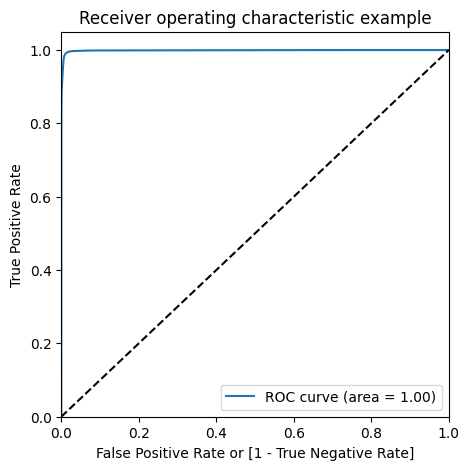

In [351]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [352]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(x_test)

In [353]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56158   692]
 [   19    93]]


In [355]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9875179944524419
Sensitivity:- 0.8303571428571429
Specificity:- 0.9878276165347405


In [356]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56850
           1       0.12      0.83      0.21       112

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [357]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(x_test)[:,1]
# roc_auc
auc = roc_auc_score(y_test, y_test_pred_proba)

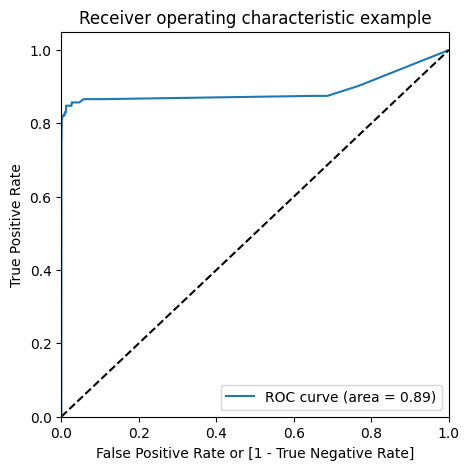

In [358]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##***Model summary***

Train set

* Accuracy = 0.99
* Sensitivity = 0.99
* Specificity = 0.98
* ROC-AUC = 1.00

Test set
* Accuracy = 0.98
* Sensitivity = 0.83
* Specificity = 0.98
* ROC-AUC = 0.89


#**Choosing the Best Model on Balanced Data**

In this project, the dataset was imbalanced, so we applied two data balancing techniques — Undersampling and SMOTE (Synthetic Minority Oversampling Technique) — to handle the class imbalance problem. After balancing the data, we built and evaluated multiple machine learning models, namely Logistic Regression, Decision Tree, Random Forest, and XGBoost.

All models performed reasonably well on the balanced datasets. However, it’s important to note that undersampling, while effective, can lead to loss of valuable information because it removes a portion of the majority class. Therefore, the models trained on SMOTE-balanced data are preferred since SMOTE generates synthetic samples for the minority class without discarding any existing data.

Among all models, Logistic Regression with SMOTE performed the best, achieving a high ROC-AUC score (around 0.99 on the training set and 0.97 on the test set). It also requires less computational resources compared to heavier models like Random Forest or XGBoost, and is easier to interpret. Hence, Logistic Regression (SMOTE) was selected as the best-performing and most efficient model.

**Print the FPR,TPR & select the best threshold from the roc curve for the best model**


In [360]:
print('Train auc =',roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9917213102187008
Threshold= 0.33314093631903546


We can see that the threshold is 0.33, for which the TPR(True positive rate) is the highest and FPR(False positive rate) is the lowest and we got the best ROC score.


**Cost-Benefit Analysis**

While evaluating models, it’s essential to consider not only their accuracy but also their resource requirements and deployment cost.
Complex models like XGBoost and Random Forest generally require higher computational power and longer training times, which increase infrastructure costs. On the other hand, Logistic Regression is lightweight, fast, and interpretable, making it a cost-effective choice for real-world deployment

##**Business Summary**

In financial fraud detection, the choice between precision and recall depends on the bank’s transaction profile:

For banks with smaller average transaction values, high precision is preferred — ensuring only genuine fraudulent transactions are flagged, minimizing unnecessary manual checks.

For banks handling high-value transactions, high recall is more important — as missing a single fraudulent transaction can result in large financial losses.

Given these considerations, our model focuses on achieving high recall while maintaining a strong overall performance.
Thus, the Logistic Regression model trained with SMOTE-balanced data is recommended as the final model — offering an optimal balance of accuracy, interpretability, cost-efficiency, and business impact.